# **1. Veri Biliminin Temelleri (Fundamentals of Data Science”)**

# İçindekiler

## 1. Veri Seti Hazırlığı
1.1 Veri Seti Hazırlığı

## 2. Eksik Veri Analizi
2.1. Eksik Verilerin Belirlenmesi  
2.2 Yöntem 1: Eksik Verilerin Silinmesi  
2.3 Yöntem 2: Eksik Verilerin Doldurulması  
- 2.3.1 Sayısal Değişkenlerin Doldurulması  
- 2.3.2 Kategorik Değişkenlerin Doldurulması  
- 2.3.3 Kategorik Kırılım ile Eksik Veri Doldurma  
- 2.3.4 Makine Öğrenmesi ile Eksik Veri Doldurma

## 3. Kategorik Değişken Analizi
3.1 Kategorik Değişken İşlemleri  
3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri  
3.3 Kategorik Gruplama (groupby) İşlemleri

## 4. Sürekli Değişken Analizi
4.1 Sürekli Değişkenlerin İncelenmesi

## 5. Aykırı Değer Analizi (Outliers)
5.1 Aykırı Gözlemlerin Silinmesi  
5.2 Aykırı Gözlemlerin Doldurulması  
- 5.2.1 Ortalama Değer İle Doldurma  
- 5.2.2 Baskılama Yöntemi

## 6. Feature Engineering
6.1 Yeni Özellik Türetme (Feature Creation)  
6.2 One-Hot Encoding  
6.3 Feature Scaling (Ölçekleme)

# Veri Biliminin Temelleri (Fundamentals of Data Science) - Uygulamalı Ders


Bu notebook'ta, gerçek bir veri seti üzerinde **veri hazırlığı** sürecinin tüm adımlarını birlikte uygulayacağız. Teoride gördüğümüz kavramları, bugün pratik yaparak pekiştireceğiz.

**Öğreneceğiniz Konular:**
- Eksik veri analizi ve doldurma stratejileri
- Veri tipi problemlerini çözme
- Aykırı değer (outlier) tespiti ve yönetimi
- Kategorik verileri kodlama (encoding)
- Özellik ölçeklendirme (feature scaling)
- Temiz, modellemeye hazır veri seti oluşturma

---

## Veri Hazırlığı Neden Kritik?

Data Science projelerinde **zamanın %70-80'i veri hazırlığına** harcanır. Çünkü:

1. **"Garbage In, Garbage Out"** prensibi: Kirli veri → Yanlış sonuçlar
2. Makine öğrenmesi modelleri eksik veya hatalı veriyle çalışamaz
3. İş dünyasında veriler nadiren "temiz" gelir - gerçek projeler böyledir.

**Örnek:** Bir e-ticaret şirketinde müşteri yaşı "-5" veya "999" olabilir, telefon numaraları eksik olabilir, kategoriler tutarsız yazılmış olabilir. Tüm bunları düzeltmeden model eğitemezsiniz.

**İÇİNDEKİLER**

**1.1 Veri Seti Hazırlığı**

Veri Seti ve Adresi: Student Performance Dataset

https://www.kaggle.com/datasets/devansodariya/student-performance-data

**Gerekli Kütüphaneleri Yükleme**

In [1]:
# Temel veri işleme kütüphaneleri
import pandas as pd # Veri manipülasyonu için en önemli araç
import numpy as np # Matematiksel işlemler ve array işlemleri

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt # Temel grafik çizimi
import seaborn as sns # Daha güzel ve kolay grafikler

# Uyarıları kapat (temiz görünüm için)
import warnings
warnings.filterwarnings('ignore')

# Grafik ayarları
plt.style.use('seaborn-v0_8-darkgrid') #Matplotlib grafiklerine Seaborn’un koyu grid (ızgara) stilini uygular.
#Grafiklerin arka planı daha okunabilir hale gelir ve eksen çizgileri belirginleşir.
sns.set_palette("husl") #husl paleti, kategorik değişkenlerin daha net ayırt edilmesini sağlayan, dengeli ve kontrastı yüksek renkler üretir.
%matplotlib inline


**Veri Setini Yükleme**

📊**Dataset Hakkında: Student Performance Dataset**

**Kaynak:** Kaggle - Student Performance in Exams  
**Veri Seti ve Adresi:** https://www.kaggle.com/datasets/devansodariya/student-performance-data

**İçerik:** Öğrencilerin akademik başarısını etkileyen demografik, ailesel ve davranışsal faktörleri incelemek
ve bu faktörlerin notlar (grades) üzerindeki etkisini analiz edebilmek.

Yani dataset şuna cevap arıyor:

“Bir öğrencinin başarısını sadece ders çalışmak mı belirler?”

Yoksa aile yapısı, ebeveyn eğitimi, sağlık, sosyal faktörler de etkili mi?

**Neden bu dataset?**
- ✅ Öğrenciler olarak kendinize yakın bulacağınız bir konu
- ✅ Gerçek hayat problemlerini içeriyor (eksik veriler, outlier'lar)
- ✅ Hem kategorik hem sayısal değişkenler var
- ✅ Temizleme teknikleri öğrenmek için ideal


### Veri Setindeki Sütunlar

| No | Sütun Adı | Açıklama |
|---|---|---|
| 1 | `school` | Okul kimliği |
| 2 | `sex` | Cinsiyet |
| 3 | `age` | Öğrencinin yaşı |
| 4 | `address` | Yaşam yeri (U: Urban, R: Rural) |
| 5 | `famsize` | Aile büyüklüğü |
| 6 | `Pstatus` | Ebeveynlerin birlikte olma durumu |
| 7 | `Medu` | Anne eğitim seviyesi (0–4) |
| 8 | `Fedu` | Baba eğitim seviyesi (0–4) |
| 9 | `Mjob` | Anne mesleği |
| 10 | `Fjob` | Baba mesleği |
| 11 | `reason` | Okul seçme nedeni |
| 12 | `guardian` | Veli |
| 13 | `traveltime` | Okula ulaşım süresi |
| 14 | `studytime` | Haftalık çalışma süresi |
| 15 | `failures` | Başarısız olunan ders sayısı |
| 16 | `schoolsup` | Okuldan ek destek |
| 17 | `famsup` | Aile desteği |
| 18 | `paid` | Özel ders durumu |
| 19 | `activities` | Okul dışı aktiviteler |
| 20 | `nursery` | Okul öncesi eğitim |
| 21 | `higher` | Yüksek öğrenim isteği |
| 22 | `internet` | İnternet erişimi |
| 23 | `romantic` | Romantik ilişki |
| 24 | `famrel` | Aile ilişkileri kalitesi (1–5) |
| 25 | `freetime` | Boş zaman değerlendirme (1–5) |
| 26 | `goout` | Dışarı çıkma sıklığı (1–5) |
| 27 | `Dalc` | Günlük alkol tüketimi (1–5) |
| 28 | `Walc` | Haftalık alkol tüketimi (1–5) |
| 29 | `health` | Sağlık durumu (1–5) |
| 30 | `absences` | Devamsızlık sayısı |
| 31 | `G1` | 1. dönem notu |
| 32 | `G2` | 2. dönem notu |
| 33 | `G3` | Final notu (Hedef değişken) |


In [2]:
!pip install -q kagglehub[pandas-datasets]

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "student_data.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "devansodariya/student-performance-data",
    file_path
)

Using Colab cache for faster access to the 'student-performance-data' dataset.


**Veri Setine Gerçekçi Problemler Ekleyelim**

Gerçek hayatta veriler nadiren "temiz" gelir. Bu derste veri temizleme tekniklerini öğrenmek için veri setimize kasıtlı olarak bazı problemler ekleyeceğiz:

1. **Eksik değerler (Missing Data)** - Bazı hücreleri boş bırakacağız
2. **Aykırı değerler (Outliers)** - Mantıksız/yanlış veri girişleri
3. **Veri tipi sorunları** - Sayısal verilerin string olarak saklanması

In [4]:
import numpy as np

# Ham veriyi koru
df_original = df.copy()

np.random.seed(42)

print("Veri setine eğitim amaçlı problemler eklenmiştir.\n")

# ===============================
# 1️⃣ EKSİK DEĞERLER (Missing Data)
# ===============================
print("1️⃣ Eksik değerler:")

# Sayısal sütunlar
if 'G3' in df.columns:
    missing_indices = np.random.choice(df.index, size=int(len(df) * 0.08), replace=False)
    df.loc[missing_indices, 'G3'] = np.nan
    print(f"   ✓ G3 (final grade): {len(missing_indices)} eksik değer")

if 'G2' in df.columns:
    missing_indices = np.random.choice(df.index, size=int(len(df) * 0.05), replace=False)
    df.loc[missing_indices, 'G2'] = np.nan
    print(f"   ✓ G2: {len(missing_indices)} eksik değer")

if 'absences' in df.columns:
    missing_indices = np.random.choice(df.index, size=int(len(df) * 0.03), replace=False)
    df.loc[missing_indices, 'absences'] = np.nan
    print(f"   ✓ absences: {len(missing_indices)} eksik değer")

# Kategorik sütunlar
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols[:2]:
    missing_indices = np.random.choice(df.index, size=int(len(df) * 0.04), replace=False)
    df.loc[missing_indices, col] = np.nan
    print(f"   ✓ {col}: {len(missing_indices)} eksik değer")

# ===============================
# 2️⃣ AYKIRI DEĞERLER (Outliers)
# ===============================
print("\n2️⃣ Aykırı değerler:")

if 'G1' in df.columns:
    outlier_indices = np.random.choice(df.index, size=3, replace=False)
    df.loc[outlier_indices, 'G1'] = np.random.choice([25, 30, -5])
    print(f"   ✓ G1: {len(outlier_indices)} aykırı değer (0–20 aralığı dışında)")

if 'age' in df.columns:
    outlier_indices = np.random.choice(df.index, size=2, replace=False)
    df.loc[outlier_indices, 'age'] = np.random.choice([10, 35])
    print(f"   ✓ age: {len(outlier_indices)} aykırı değer")

if 'absences' in df.columns and df['absences'].notna().sum() > 0:
    outlier_indices = np.random.choice(df[df['absences'].notna()].index, size=2, replace=False)
    df.loc[outlier_indices, 'absences'] = np.random.choice([200, 300])
    print(f"   ✓ absences: {len(outlier_indices)} aykırı değer (çok yüksek)")

# ===============================
# 3️⃣ VERİ TİPİ SORUNLARI
# ===============================
print("\n3️⃣ Veri tipi tutarsızlıkları:")

if 'studytime' in df.columns:
    string_indices = np.random.choice(df.index, size=int(len(df) * 0.03), replace=False)
    df.loc[string_indices, 'studytime'] = df.loc[string_indices, 'studytime'].astype(str)
    print(f"   ✓ studytime: {len(string_indices)} değer string'e çevrildi")

# ===============================
# 📊 ÖZET
# ===============================
print("\n📊 Özet:")
print(f"   • Toplam eksik değer sayısı: {df.isnull().sum().sum()}")
print(f"   • Etkilenen sütun sayısı: {(df.isnull().sum() > 0).sum()}")
print(f"   • Veri seti boyutu: {df.shape[0]} satır x {df.shape[1]} sütun")


Veri setine eğitim amaçlı problemler eklenmiştir.

1️⃣ Eksik değerler:
   ✓ G3 (final grade): 31 eksik değer
   ✓ G2: 19 eksik değer
   ✓ absences: 11 eksik değer
   ✓ school: 15 eksik değer
   ✓ sex: 15 eksik değer

2️⃣ Aykırı değerler:
   ✓ G1: 3 aykırı değer (0–20 aralığı dışında)
   ✓ age: 2 aykırı değer
   ✓ absences: 2 aykırı değer (çok yüksek)

3️⃣ Veri tipi tutarsızlıkları:
   ✓ studytime: 11 değer string'e çevrildi

📊 Özet:
   • Toplam eksik değer sayısı: 91
   • Etkilenen sütun sayısı: 5
   • Veri seti boyutu: 395 satır x 33 sütun


**Veriyi İnceleme**

In [5]:
#Verisetinin genel görünümü
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,NaN,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6.0,5,6.0,NaN
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7,8.0,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15,14.0,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11.0,9,9.0,NaN
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3.0,14,16.0,NaN
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3.0,10,8.0,7.0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0.0,11,12.0,NaN


In [6]:
# İlk beş satırın gösterilmesi
df.head()

#Burada parantez içine değer de verilebilir. Örneğin df.head(n=2) dediğimiz zaman veri setindeki ilk 2 sütunu bize gösterir.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,NaN,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6.0,5,6.0,NaN
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7,8.0,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15,14.0,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6,10.0,10.0


In [7]:
#Veri setindeki satır ve sütun sayılarını görmek için .shape kullanırız. Kullanımı;
df.shape # -> (satır, sütun)

(395, 33)

Veri setindeki değişkenlerin isimlerine erişmek istersek df.columns kullanabiliriz.

In [8]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'] 

Veri seti içerisinde toplam 33 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



Veri setinin yapısını anlamak için info() metodundan faydalanılır.
Bu aşamada sütunların veri tipleri, her sütunda bulunan kayıt sayısı ve kolon isimleri kontrol edilerek veri setinde olası tutarsızlıklar tespit edilmeye çalışılır. Bu kontrol, veri hazırlığı sürecinin temel adımlarından biridir.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      380 non-null    object 
 1   sex         380 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    object 
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

Sadece elimizdeki değişkenleri görmek ve bu değişkenlerin veri tiplerini incelemek için .dtypes attribute'unu kullanabiliriz. Attribute ve metod ayrımı yapmak için paranteze bakarız. Eğer sonunda parantez olsaydı buna metod derdik.

In [10]:
df.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


Elimizdeki veri setinde kategorik ve numerik özellikler birlikte bulunmakta. Bu özellikleri ayırmak ve farklı değişken listelerinde kullanmak bizim için faydalı olabilir, özellikle kolon bazlı işlemler yapmak istersek bu listeleri bir filtre olarak kullanabiliriz.

UYARI !: Veri setinin ham halinde, kolonların veri tipleri her zaman olması gerektiği haliyle olmayabilir. Kategorik ve numerik kolonları ayırırken öncelikle her değişkenin doğru veri tipinde olduğundan emin olmalısınız.

In [11]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)


In [12]:
feature_summary = pd.DataFrame({
    "Categorical Features": pd.Series(categorical_features),
    "Numerical Features": pd.Series(numerical_features)
})

feature_summary


,Categorical Features,Numerical Features
0,school,age
1,sex,Medu
2,address,Fedu
3,famsize,traveltime
4,Pstatus,failures
5,Mjob,famrel
6,Fjob,freetime
7,reason,goout
8,guardian,Dalc
9,studytime,Walc


Örneğin, veri tipi object olan kategorik değişkenleri category veri tipine dönüştürmek isteyebiliriz.
Bunun için kolon isimleri üzerinde bir döngü kurarak ilerleyebiliriz.

Bu döngü içerisinde, eğer mevcut kolon adı categorical_features listesinde yer alıyorsa, ilgili kolonun veri tipini category olarak güncelleriz. Liste dışında kalan kolonlar için ise herhangi bir işlem yapmayız.

In [13]:
for col in df.columns:
    if col in categorical_features:
        df[col] = df[col].astype("category")


In [14]:
df[categorical_features].dtypes


,0
school,category
sex,category
address,category
famsize,category
Pstatus,category
Mjob,category
Fjob,category
reason,category
guardian,category
studytime,category


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      380 non-null    category
 1   sex         380 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    category
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [16]:
df['school'][:5]


,school
0,NaN
1,GP
2,GP
3,GP
4,GP


describe() metodu, sayısal değişkenlere ait temel istatistiksel özet bilgileri görmemizi sağlar.

describe().T metodu, bu özet bilgilerin daha okunabilir bir formatta (değişken bazlı) görüntülenmesini sağlar.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.663291,1.357642,10.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0
Walc,395.0,2.291139,1.287897,1.0,1.0,2.0,3.0,5.0


In [18]:
#Verisetindeki son 5 satırın çıktısının gösterilmesi
df.tail()
#Burada parantez içine değer de verilebilir. Örneğin df.tail(n=2) dediğimiz zaman veri setindeki son 2 sütunu bize gösterir.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11.0,9,9.0,NaN
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3.0,14,16.0,NaN
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3.0,10,8.0,7.0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0.0,11,12.0,NaN
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5.0,8,9.0,9.0


**2. Eksik Veri Analizi**


Eksik veri, işlem yapılan veri seti içerisinde bazı gözlemlerin boş veya tanımsız olması durumudur.
Bu tür değerler genellikle NaN veya NA olarak karşımıza çıkar.

Eksik veri analizi, veri setimizde yer alan eksik gözlemleri belirleyerek bu durumu en doğru şekilde ele almayı amaçlar. Veri içerisinde eksik değerlerin bulunması, çoğu zaman yapısal bir probleme işaret eder ve bu durum göz ardı edilmemelidir.

Eksik veriler; veri setinin yapısına ve eksikliğin oranına bağlı olarak silinebilir ya da uygun yöntemlerle doldurulabilir. Ancak eksik değerlerin silinmesi, ilgili satır veya sütunlardaki diğer bilgilerin de kaybedilmesine yol açabilir. Öte yandan, eksik verilerin doldurulması sürecinde veri setine yapay değerler eklendiği için, bu işlem veri dağılımlarını etkileyerek yanlılığa neden olabilir.

Bu nedenle eksik verilerin oluşma nedenleri dikkatlice analiz edilmeli ve hangi yöntemin uygulanacağına bu analiz sonucunda karar verilmelidir.

**2.1. Eksik Verilerin Belirlenmesi**

In [19]:
# Eksik verilerin olup olmadığını kontrol etme
df.isnull().values.any()

np.True_

In [20]:
#Eksik verilerin gösterilmesi
df.isnull().sum()

,0
school,15
sex,15
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [21]:
#Verisetindeki toplam eksik değer sayısı
df.isnull().sum().sum()

np.int64(91)

In [22]:
# Toplam kayıt sayısı
total_rows = len(df)

# Eksik değerlerin sayısını ve oranını hesaplama
missing_counts = df.isna().sum()  # Eksik değerlerin sayısı
missing_percentage = (missing_counts / total_rows) * 100  # Oranı yüzdeye çevir

# Eksik değer oranını yazdırma
print("Eksik Değer Sayısı:")
print(missing_counts)
print("\nEksik Değer Yüzdesi (%):")
print(missing_percentage)

Eksik Değer Sayısı:
school        15
sex           15
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences      11
G1             0
G2            19
G3            31
dtype: int64

Eksik Değer Yüzdesi (%):
school        3.797468
sex           3.797468
age           0.000000
address       0.000000
famsize       0.000000
Pstatus       0.000000
Medu          0.000000
Fedu          0.000000
Mjob          0.000000
Fjob          0.000000
reason        0.000000
guardian      0.000000
traveltime    0.000000
studytime     0.000000
failures      0.000000
schoolsup     0.000000
famsup      

In [23]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

,0
school,380
sex,380
age,395
address,395
famsize,395
Pstatus,395
Medu,395
Fedu,395
Mjob,395
Fjob,395


In [24]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 12944 adet eksik olmayan, 91 eksik gözlem var.


In [25]:
# En az bir tane eksik (NaN) değer içeren satırları görüntülemek için
df[df.isnull().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,NaN,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6.0,5,6.0,NaN
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0.0,14,15.0,NaN
15,GP,F,16,U,GT3,T,4,4,health,other,...,4,4,4,1,2,2,4.0,14,14.0,NaN
18,GP,NaN,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,16.0,6,5.0,5.0
21,NaN,M,15,U,GT3,T,4,4,health,health,...,5,4,2,1,1,5,0.0,12,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,MS,NaN,17,U,GT3,T,2,3,other,services,...,4,4,3,1,1,3,2.0,11,11.0,10.0
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0.0,6,NaN,0.0
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11.0,9,9.0,NaN
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3.0,14,16.0,NaN


In [26]:
# Tüm sütunlarında eksik (NaN) değer bulunmayan, yani tamamen dolu olan kayıtları seçiyoruz
# Ardından bu kayıtların ilk 5 tanesini görüntülüyoruz
df[df.notnull().all(axis=1)][:5]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7,8.0,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15,14.0,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6,10.0,10.0
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10.0,15,15.0,15.0


In [27]:
!pip install missingno

Missingno kütüphanesi, veri setindeki eksik değerlerin dağılımını görsel olarak incelememizi sağlar. Bu sayede eksik verilerin hangi sütunlarda ve hangi örüntülerde yoğunlaştığını hızlıca tespit edebiliriz.

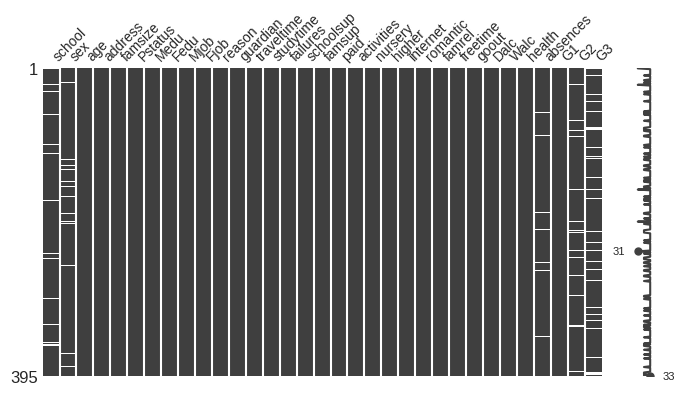

In [28]:
#!pip install missingno -> missingno kütüphanesini kullanabilmek için öncelikle yüklemeniz lazım.
import missingno as msno
msno.matrix(df, figsize=(8, 4), fontsize=10)
plt.show()

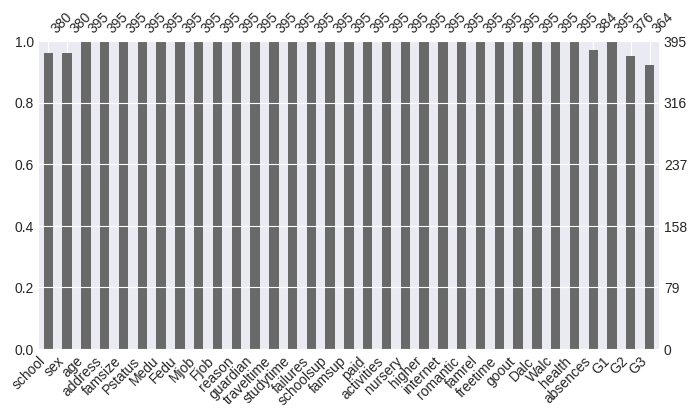

In [29]:
# Eksik verilerin sütun bazlı dağılımını incelemek için bar chart kullanalım.
# Bu grafik, her bir değişkende kaç adet eksik gözlem bulunduğunu görmemizi sağlar.
# Eksikliği yüksek olan değişkenler, ileride özel olarak ele alınmalıdır.

msno.bar(df, figsize=(8, 4), fontsize=10)
plt.show()

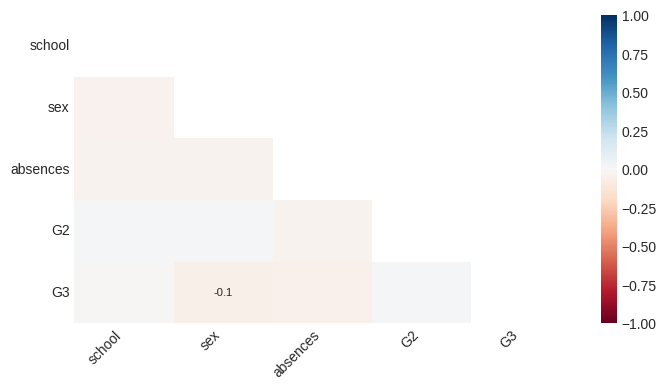

In [30]:
# Eksik veriler arasındaki ilişkiyi incelemek için heatmap kullanalım.
# Bu grafik, sütunlardaki eksik değerlerin birlikte ortaya çıkıp çıkmadığını gösterir.
# Korelasyon değeri 1'e yaklaştıkça, eksikliklerin birlikte oluşma ihtimali artar.
# 0'a yakın değerler ise değişkenler arasında anlamlı bir ilişki olmadığını ifade eder.

msno.heatmap(df, figsize=(8, 4), fontsize=10)
plt.show()


**2.2 Yöntem 1: Eksik Verilerin Silinmesi**

Eksik verilerle başa çıkma yöntemlerinden biri, eksik gözlem içeren satır veya sütunların veri setinden tamamen silinmesidir. Bu yöntem uygulanması oldukça kolay olsa da, doğrudan kullanılmadan önce dikkatli bir değerlendirme yapılması gerekir.

Bir gözlemin silinebilmesi için, ilgili eksik değerin doğal olmayan veya analizi yanıltacak bir durumdan kaynaklandığından emin olunmalıdır. Bazı durumlarda eksik değerler, veri setinin doğası gereği ortaya çıkabilir. Bu tür yapısal eksikliklerde silme işlemi yerine uygun doldurma yöntemleri tercih edilmelidir.

Ayrıca, eksik verilerin veri seti içerisindeki oranı da büyük önem taşımaktadır. Eğer eksik değerler toplam veri setinin kayda değer bir kısmını oluşturuyorsa, bu gözlemlerin silinmesi ciddi bir veri kaybına yol açabilir. Bu durum, hem istatistiksel analizlerin hem de makine öğrenmesi modellerinin performansını olumsuz etkileyebilir.

Bu nedenle, eksik verilerin silinmesi yöntemi uygulanmadan önce veri setinin genel yapısı incelenmeli ve mümkün olduğunca bilgi kaybını en aza indirecek yaklaşımlar tercih edilmelidir.

İlk olarak, Pandas’ın dropna() metodunu kullanarak eksik değerlere sahip gözlemleri veri setinden geçici olarak silelim.
Burada amacımız, silme işleminin veri setini nasıl etkilediğini gözlemlemek.

In [31]:
# Eksik verilerin dropna() ile silinmesi
# inplace=False olduğu için veri seti üzerinde kalıcı bir değişiklik yapılmaz

df.dropna(inplace=False).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7,8.0,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15,14.0,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6,10.0,10.0
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10.0,15,15.0,15.0


Bazı durumlarda bir satırdaki tüm sütunlar eksik (NaN) olabilir.
Bu tür gözlemler veri setine hiçbir bilgi katkısı sağlamaz. Böyle bir durumda yalnızca tamamen boş olan satırları silmek daha kontrollü bir yaklaşım olabilir.

In [32]:
# Sadece tüm değerleri eksik (tamamı NaN) olan gözlemleri silmek
# Bu işlem kalıcı değildir

df.dropna(how='all').head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,NaN,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6.0,5,6.0,NaN
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7,8.0,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15,14.0,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6,10.0,10.0


Bazı durumlarda eksik değerler satırlarda değil, belirli değişkenlerde yoğunlaşmış olabilir.
Bu gibi senaryolarda, eksik veri içeren kolonların tamamen silinmesi tercih edilebilir.

In [33]:
# Değişken (kolon) bazında eksik veri içeren sütunları silmek
# axis=1 → kolonlar üzerinde işlem yapılacağını belirtir
# Bu işlem kalıcı değildir

df.dropna(axis=1)

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G1
0,18,U,GT3,A,4,4,at_home,teacher,course,mother,...,yes,no,no,4,3,4,1,1,3,5
1,17,U,GT3,T,1,1,at_home,other,course,father,...,yes,yes,no,5,3,3,1,1,3,5
2,15,U,LE3,T,1,1,at_home,other,other,mother,...,yes,yes,no,4,3,2,2,3,3,7
3,15,U,GT3,T,4,2,health,services,home,mother,...,yes,yes,yes,3,2,2,1,1,5,15
4,16,U,GT3,T,3,3,other,other,home,father,...,yes,no,no,4,3,2,1,2,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,U,LE3,A,2,2,services,services,course,other,...,yes,no,no,5,5,4,4,5,4,9
391,17,U,LE3,T,3,1,services,services,course,mother,...,yes,yes,no,2,4,5,3,4,2,14
392,21,R,GT3,T,1,1,other,other,course,other,...,yes,no,no,5,5,3,3,3,3,10
393,18,R,LE3,T,3,2,services,other,course,mother,...,yes,yes,no,4,4,1,3,4,5,11


**2.3 Yöntem 2: Eksik Verilerin Doldurulması**

Eksik verilerin doldurulması, veri setinden gözlem veya değişken silmeye kıyasla daha az veri kaybına yol açtığı için sıklıkla tercih edilen bir yöntemdir. Ancak bu yöntemin de dikkatli ve bilinçli bir şekilde uygulanması gerekir.

Doldurma işlemi sırasında veri setine gerçekte var olmayan (sentetik) değerler eklenmiş olur. Bu durum, veriye gürültü (noise) eklenmesine ve veri dağılımlarının bozulmasına neden olabilir. Özellikle istatistiksel analizler ve makine öğrenmesi modelleri söz konusu olduğunda, bu tür müdahaleler sonuçların güvenilirliğini olumsuz etkileyebilir.

Bu nedenle eksik verilerin doldurulmasına karar verirken:

Eksikliğin neden oluştuğu,

Eksik değerlerin veri setindeki oranı,

İlgili değişkenin problem açısından önemi

mutlaka birlikte değerlendirilmelidir.

En doğru doldurma yöntemi, her veri seti ve her problem için farklılık gösterebilir. Bu bölümde, yaygın olarak kullanılan doldurma yaklaşımlarını inceleyerek hangi durumlarda hangi yöntemin daha uygun olabileceğini ele alacağız.

In [34]:
# Doldurma işlemlerini gerçekleştirmek için veri setinin bir kopyasını oluşturma işlemini gerçekleştiriyorum.
df_fillna = df.copy()


In [35]:
df_fillna = df.copy()

# Sayısal değişkenlerin 0 ile doldurulması
for col in numerical_features:
    if df_fillna[col].isnull().any():
        df_fillna[col] = df_fillna[col].fillna(0)

# Kategorik değişkenlerin 'Missing' (Eksik) ifadesiyle veya mod değerleriyle doldurulması.
# Gösterim amacıyla şimdilik 'Missing' ifadesini kullanıyoruz.
for col in categorical_features:
    if df_fillna[col].isnull().any():
        # Add 'Missing' to categories first
        if 'Missing' not in df_fillna[col].cat.categories:
            df_fillna[col] = df_fillna[col].cat.add_categories('Missing')
        df_fillna[col] = df_fillna[col].fillna('Missing')

In [36]:
df_fillna.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,Missing,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6.0,5,6.0,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7,8.0,10.0


In [37]:
df_fillna.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [38]:
# Sütun adlarını kontrol edelim
df_fillna.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

**2.3.1 Sayısal Değişkenlerin Doldurulması**

In [39]:
# absences değişkeninin ortalamasını hesaplayalım
mean_absences = df_fillna['absences'].mean()

# absences sütunundaki eksik değerleri ortalama ile dolduralım
df_fillna['absences'] = df_fillna['absences'].fillna(mean_absences)

df_fillna.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [40]:
# Doldurma işleminin döngüyle yapılması
to_be_filled = numerical_features[1:]

for col in to_be_filled:
    df_fillna[col] = df_fillna[col].fillna(df_fillna[col].mean())

df_fillna.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.663291,1.357642,10.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0
Walc,395.0,2.291139,1.287897,1.0,1.0,2.0,3.0,5.0


Sayısal değişkenlerde eksik değerler ortalama (mean) kullanılarak doldurulmuştur.
Ancak veri dağılımının simetrik olmadığı, kuyruklu (skewed) yapıya sahip olduğu durumlarda ortalama değer uç gözlemlerden etkilenebilir. Bu gibi durumlarda, daha dayanıklı bir ölçü olan medyan (median) değeri ile doldurma işlemi tercih edilebilir.

In [42]:
df_fillna[col] = df_fillna[col].fillna(df_fillna[col].median())

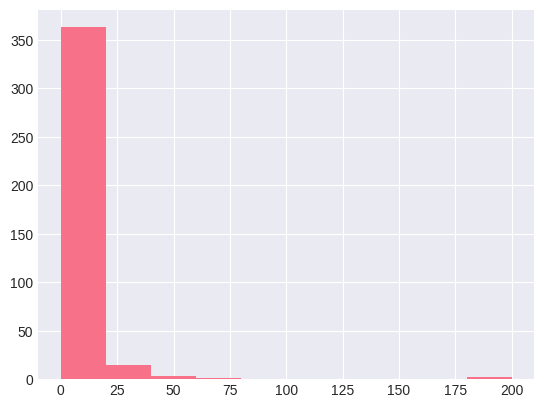

In [43]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanılabilir.
plt.hist(df['absences'])
plt.show()

**2.3.2 Kategorik Değişkenlerin Doldurulması**

Kategorik değişkenlerde eksik değerleri doldurmak için en sık tekrar eden değer (mode) yaygın olarak kullanılan bir yöntemdir.
Bu yaklaşım, özellikle kategoriler arasında belirgin bir baskın sınıf bulunduğu durumlarda tercih edilir.

In [44]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# school değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['school'].isna().sum()

# school değişkeninde en çok tekrar eden değeri(mode) alalım.
school_mode = df_fillna['school'].mode()

# school değişkenini mode değeri ile dolduralım.
df_fillna['school'] = df_fillna['school'].fillna(value = school_mode[0])

# school değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [45]:
df_fillna[["sex"]][:20]

,sex
0,F
1,F
2,F
3,F
4,F
5,M
6,M
7,F
8,M
9,M


In [46]:
# Önceki değer ile doldurma işlemi
df_fillna["sex"].fillna(method = "bfill")

,sex
0,F
1,F
2,F
3,F
4,F
...,...
390,M
391,M
392,M
393,M


In [47]:
# Sonraki değer ile doldurma işlemi
df_fillna["sex"].fillna(method = "ffill")

,sex
0,F
1,F
2,F
3,F
4,F
...,...
390,M
391,M
392,M
393,M


**2.3.3 Kategorik Kırılım ile Eksik Veri Doldurma**

Basitçe `mean` veya `median` değerleri ile eksik verileri doldurmak hızlı bir çözüm sağlar; ancak her zaman en doğru yaklaşım değildir. Daha analitik bir yöntem, eksik verileri veri içindeki kategorik kırılımlara göre doldurmaktır.

Örneğin, elimizde `salary` (maaş) kolonu var ve bu kolonda eksik veriler bulunuyor. Sadece genel ortalama veya medyan ile doldurmak yerine, elimizde `job_title` (iş pozisyonu) kolonu olduğunu biliyoruz. Bu durumda, eksik bir maaş verisini, aynı `job_title` grubuna ait maaşların ortalama veya medyan değeri ile doldurmak daha doğru olur.  

Farklı pozisyonların maaşları farklı olacağından, eksik maaşı kendi grubunun istatistiksel değerine göre doldurmak, veriyi daha anlamlı hâle getirir.


In [48]:
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

,0
school,15
sex,15
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [49]:
school_mode = df_categorical_fillna['school'].mode()[0]
df_categorical_fillna['school'].fillna(value=school_mode, inplace=True)

In [50]:
df_categorical_fillna.isna().sum()

,0
school,0
sex,15
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [51]:
df_categorical_fillna[df_categorical_fillna[["school", "sex"]].isna().all(axis=1)][["school", "sex"]]

,school,sex


In [52]:
df_categorical_fillna[df_categorical_fillna['school'].isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


**2.3.4 Makine Öğrenmesi ile Eksik Veri Doldurma**

Eksik verileri doldurmak için sadece basit istatistiksel yöntemler değil, **makine öğrenmesi modelleri** de kullanılabilir. Bu yöntemler, veri setindeki diğer kolonlardaki ilişkileri öğrenerek eksik değerleri tahmin eder.  

Aşağıdaki modeller kullanılabilir:

- **KNNImputer (K-Nearest Neighbor)**: Benzer gözlemleri bulup eksik değeri tahmin eder.  
- **Random Forest Classifier/Regressor**: Eksik değerleri diğer değişkenlerden tahmin etmek için ağaç tabanlı modeller kullanır.  

Daha detaylı örnek ve uygulamalar için Google’da şu sorguları arayabilirsiniz:  
- `"How can I fill missing values by using Machine Learning techniques in Python?"`  
- `"Python ile eksik verileri Makine Öğrenmesi teknikleri kullanarak nasıl doldurabilirim?"`  


**3. Kategorik Değişken Analizi**

In [53]:
df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      380 non-null    category
 1   sex         380 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    category
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

**3.1 Kategorik Değişken İşlemleri**

#### Kategorik Değişkenlerin Seçilmesi

Veri setinde belirli bir veri tipine sahip kolonları seçmek için `select_dtypes()` fonksiyonu kullanılabilir.  
Bu veri setinde kategorik değişkenler `object` yerine `category` veri tipi ile temsil edilmektedir.


In [54]:
# Veri tipi 'category' olan (kategorik) değişkenleri seçme
df_categorical = df.select_dtypes(include="category")

# İlk 3 gözlemi görüntüleme
df_categorical.head(3)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,NaN,F,U,GT3,A,at_home,teacher,course,mother,2,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,2,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,2,yes,no,yes,no,yes,yes,yes,no


Bir kategorik değişkenin kaç farklı sınıfa sahip olduğunu ve bu sınıfların neler olduğunu görmek için
`unique()` fonksiyonu kullanılabilir. Aşağıda `address` değişkenine ait benzersiz değerler incelenmiştir.

In [55]:
# 'address' değişkenindeki benzersiz değerleri görüntüleme
df_categorical["address"].unique()

['U', 'R']
Categories (2, object): ['R', 'U']

In [56]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 2 unique values in "school" categorical feature.

There are 2 unique values in "sex" categorical feature.

There are 2 unique values in "address" categorical feature.

There are 2 unique values in "famsize" categorical feature.

There are 2 unique values in "Pstatus" categorical feature.

There are 5 unique values in "Mjob" categorical feature.

There are 5 unique values in "Fjob" categorical feature.

There are 4 unique values in "reason" categorical feature.

There are 3 unique values in "guardian" categorical feature.

There are 8 unique values in "studytime" categorical feature.

There are 2 unique values in "schoolsup" categorical feature.

There are 2 unique values in "famsup" categorical feature.

There are 2 unique values in "paid" categorical feature.

There are 2 unique values in "activities" categorical feature.

There are 2 unique values in "nursery" categorical feature.

There are 2 unique values in "higher" categorical feature.

There are 2 unique values in "int

In [57]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

school
GP    337
MS     43
Name: count, dtype: int64
 *********************************************
sex
F    204
M    176
Name: count, dtype: int64
 *********************************************
address
U    307
R     88
Name: count, dtype: int64
 *********************************************
famsize
GT3    281
LE3    114
Name: count, dtype: int64
 *********************************************
Pstatus
T    354
A     41
Name: count, dtype: int64
 *********************************************
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
 *********************************************
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64
 *********************************************
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64
 *********************************************
guardian
mother    273
father     90

In [58]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
guardian_categories = df["guardian"].unique().tolist()[::-1]
guardian_categories

['other', 'father', 'mother']

In [59]:
# Ordinal değişken nasıl oluşturulur?
from pandas.api.types import CategoricalDtype

df["guardian"] = df["guardian"].astype(CategoricalDtype(categories = guardian_categories, ordered = True))

In [60]:
df["guardian"].head()

,guardian
0,mother
1,father
2,mother
3,mother
4,father


**3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri**

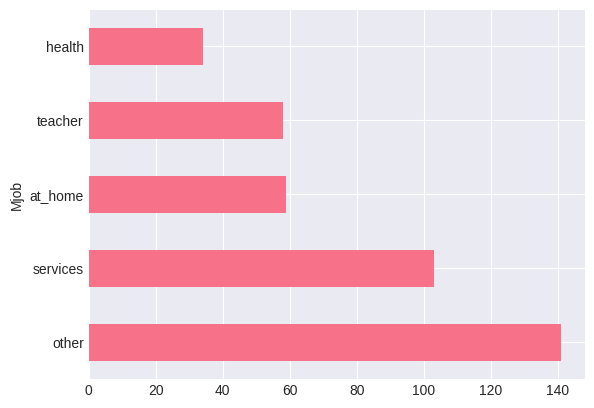

In [61]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
df['Mjob'].value_counts().plot.barh();

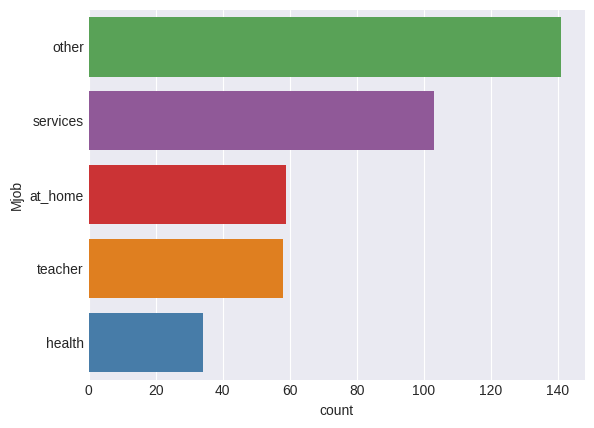

In [62]:
sns.countplot(data = df,
              y = "Mjob",
              hue = "Mjob",
              order = df["Mjob"].value_counts().index,
              palette = "Set1");

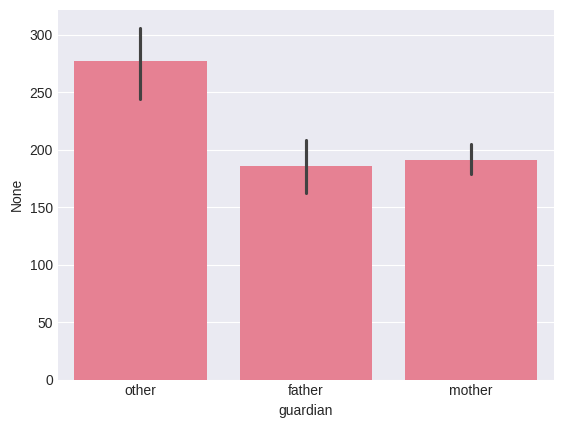

In [63]:
sns.barplot(data = df, x = "guardian", y = df.guardian.index);

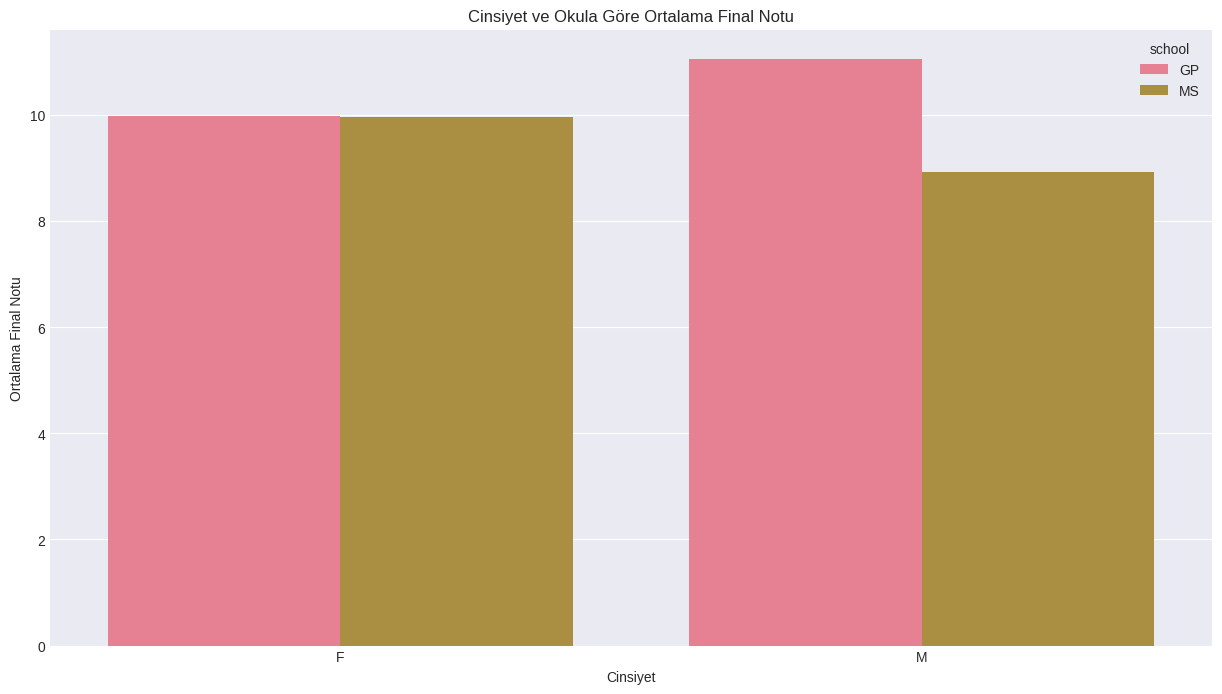

In [64]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=df,
    x="sex",
    y="G3",
    hue="school",
    ci=None
)
plt.title("Cinsiyet ve Okula Göre Ortalama Final Notu")
plt.xlabel("Cinsiyet")
plt.ylabel("Ortalama Final Notu")
plt.show()

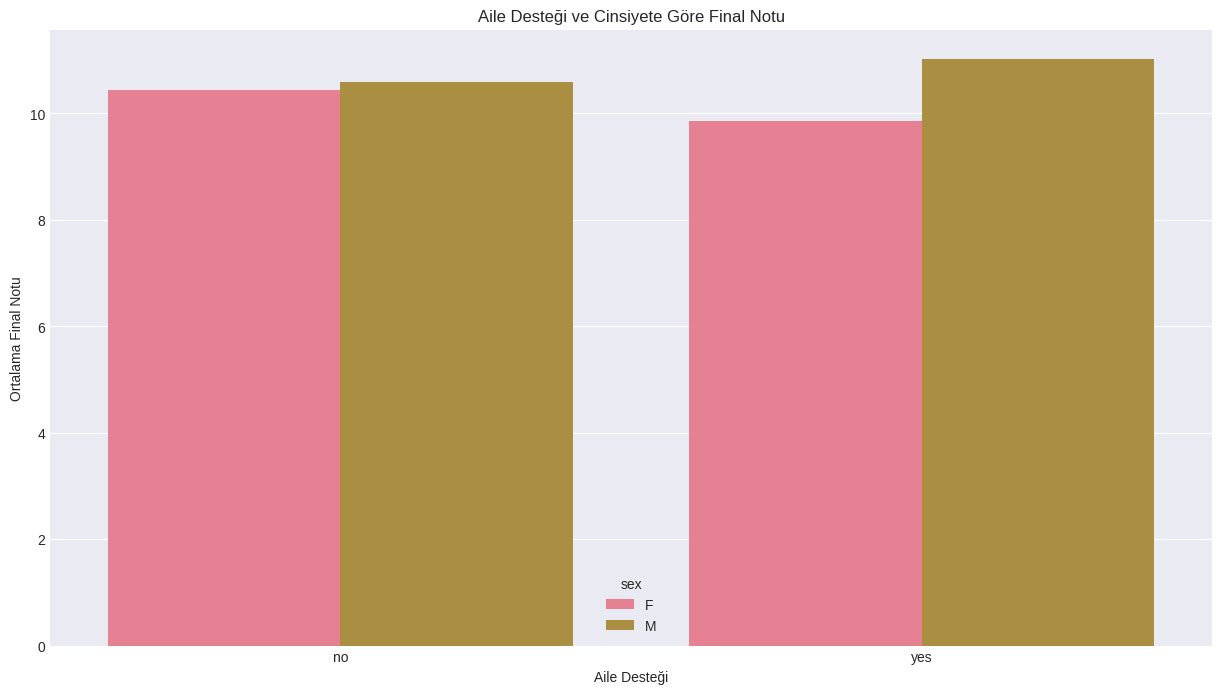

In [65]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=df,
    x="famsup",
    y="G3",
    hue="sex",
    ci=None
)
plt.title("Aile Desteği ve Cinsiyete Göre Final Notu")
plt.xlabel("Aile Desteği")
plt.ylabel("Ortalama Final Notu")
plt.show()


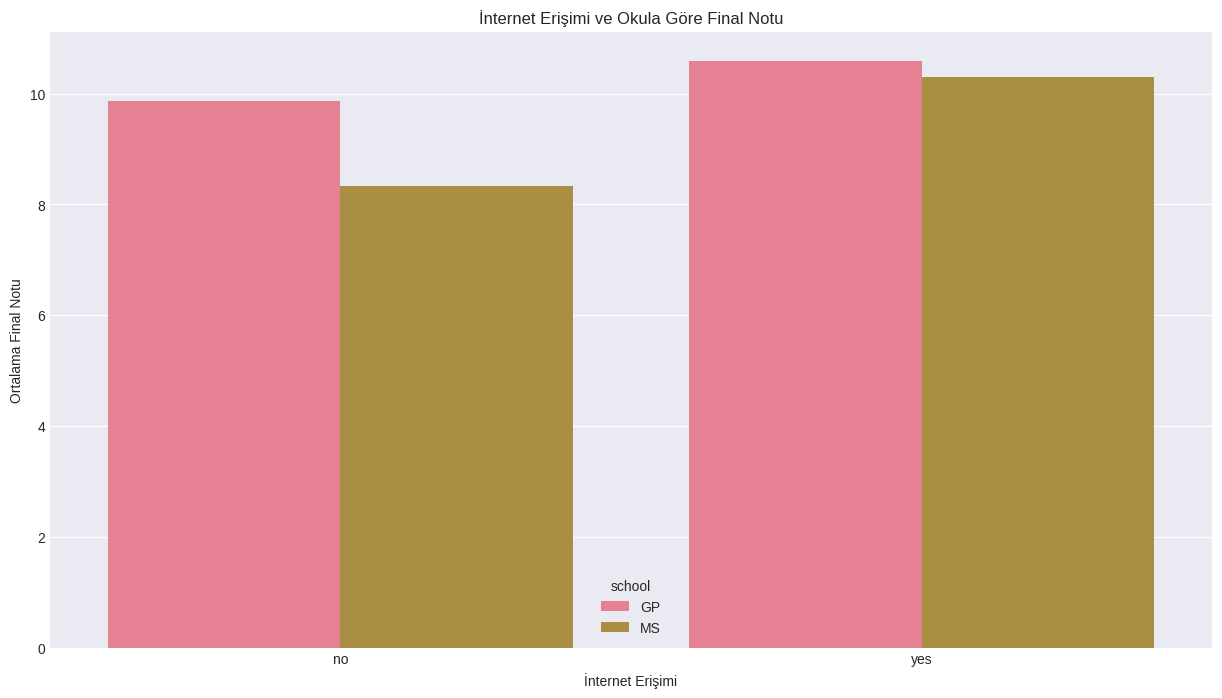

In [66]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=df,
    x="internet",
    y="G3",
    hue="school",
    ci=None
)
plt.title("İnternet Erişimi ve Okula Göre Final Notu")
plt.xlabel("İnternet Erişimi")
plt.ylabel("Ortalama Final Notu")
plt.show()


**3.3 Kategorik Gruplama (groupby) İşlemleri**

Kategorik gruplama işlemleri, belirli kategorik değişkenlere göre sayısal değişkenlerin
istatistiksel özetlerini incelemek için kullanılır. Bu sayede farklı gruplar arasındaki
benzerlikler ve farklılıklar daha net bir şekilde analiz edilebilir.

Bu bölümde öğrenci performans veri seti kullanılarak, kategorik değişkenlere göre
öğrencilerin akademik başarıları incelenmiştir.

In [67]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,NaN,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6.0,5,6.0,NaN
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7,8.0,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15,14.0,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6,10.0,10.0


In [68]:
#Cinsiyete göre ortalama final notu
df.groupby("sex")["G3"].mean()

,G3
sex,
F,10.031250
M,10.821656


In [69]:
#Aile desteğine göre not istatistikleri
df.groupby("famsup")["G3"].agg(["mean", "median", "min", "max", "count"])

,mean,median,min,max,count
famsup,,,,,
no,10.597122,11.0,0.0,20.0,139
yes,10.275556,11.0,0.0,19.0,225


In [70]:
#Okul ve cinsiyete göre ortalama final notu
df.groupby(["school", "sex"])["G3"].mean()

school  sex
GP      F       9.981250
        M      11.057971
MS      F       9.958333
        M       8.923077
Name: G3, dtype: float64

In [71]:
#groupby Sonucunu Tablo Haline Getirme
grouped_df = (
    df.groupby(["school", "sex"])["G3"]
    .mean()
    .reset_index()
)

grouped_df

,school,sex,G3
0,GP,F,9.981250
1,GP,M,11.057971
2,MS,F,9.958333
3,MS,M,8.923077


`reset_index()` kullanılarak grup bazlı hesaplanan sonuçlar tablo formatına dönüştürülmüştür.
Bu yapı, görselleştirme işlemleri için daha uygundur.


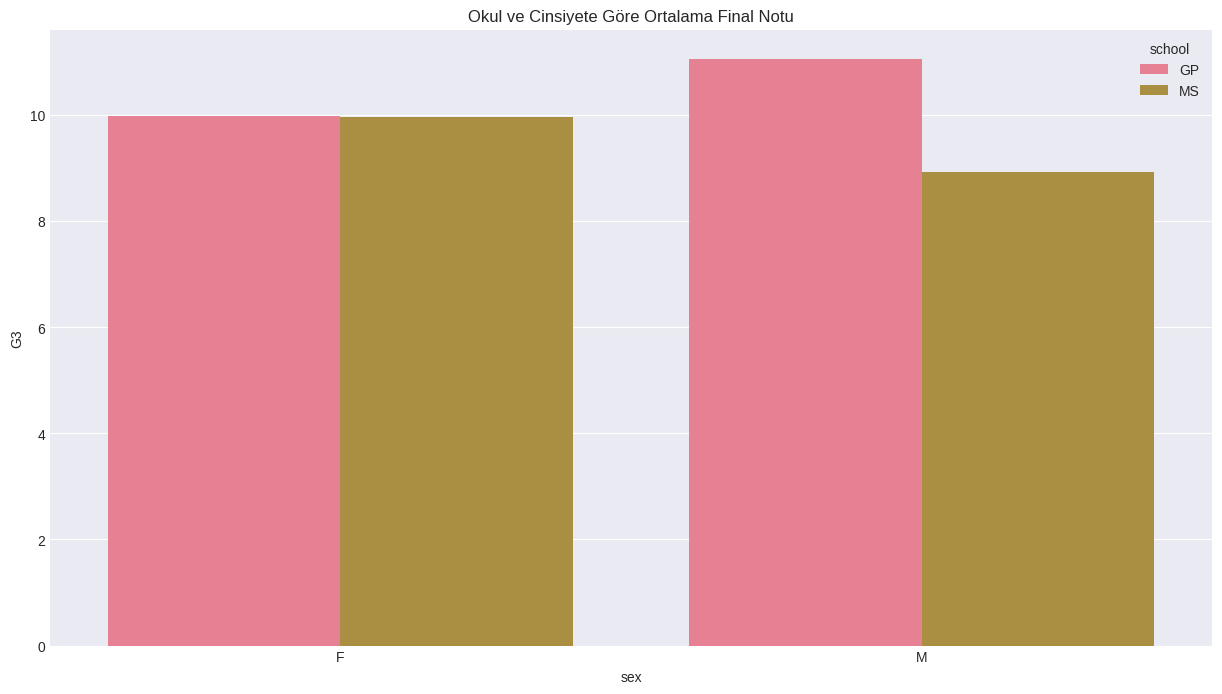

In [72]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=grouped_df,
    x="sex",
    y="G3",
    hue="school",
    ci=None
)
plt.title("Okul ve Cinsiyete Göre Ortalama Final Notu")
plt.show()


**4. Sürekli Değişken Analizi**

4.1 Sürekli Değişkenlerin İncelenmesi

In [73]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,age,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,0,4,3,4,1,1,3,6.0,5,6.0,NaN
1,17,1,1,1,0,5,3,3,1,1,3,4.0,5,5.0,6.0
2,15,1,1,1,3,4,3,2,2,3,3,10.0,7,8.0,10.0
3,15,4,2,1,0,3,2,2,1,1,5,2.0,15,14.0,15.0
4,16,3,3,1,0,4,3,2,1,2,5,4.0,6,10.0,10.0


In [74]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.663291,1.357642,10.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0
Walc,395.0,2.291139,1.287897,1.0,1.0,2.0,3.0,5.0


In [75]:
def stats_overview(dataframe: pd.DataFrame) -> pd.DataFrame:
    num_df = dataframe.select_dtypes(include=["int", "float"])

    stats_df = num_df.agg(['mean', 'std', 'min', 'max', 'median', 'count']).T

    return stats_df

In [76]:
stats_overview(df)

,mean,std,min,max,median,count
age,16.663291,1.357642,10.0,22.0,17.0,395.0
Medu,2.749367,1.094735,0.0,4.0,3.0,395.0
Fedu,2.521519,1.088201,0.0,4.0,2.0,395.0
traveltime,1.448101,0.697505,1.0,4.0,1.0,395.0
failures,0.334177,0.743651,0.0,3.0,0.0,395.0
famrel,3.944304,0.896659,1.0,5.0,4.0,395.0
freetime,3.235443,0.998862,1.0,5.0,3.0,395.0
goout,3.108861,1.113278,1.0,5.0,3.0,395.0
Dalc,1.481013,0.890741,1.0,5.0,1.0,395.0
Walc,2.291139,1.287897,1.0,5.0,2.0,395.0


Bu çıktı, veri setindeki sayısal değişkenlere ait temel istatistiksel bilgileri göstermektedir.


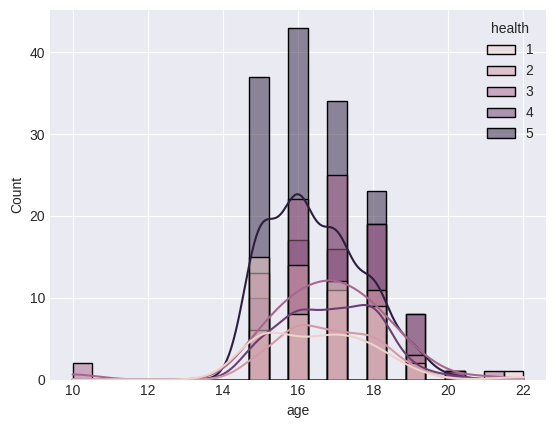

In [77]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
sns.histplot(data = df, x = "age", kde = True, hue = "health");

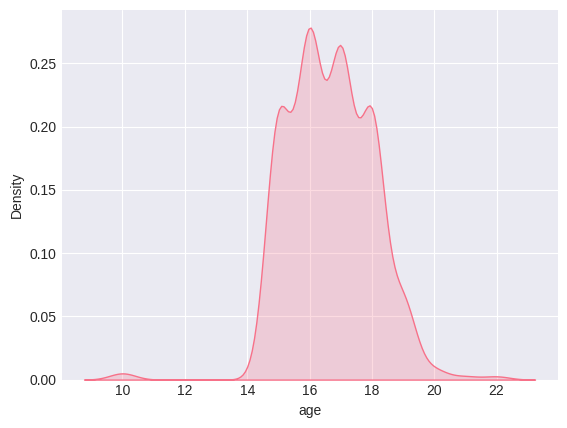

In [78]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['age'], fill = True);

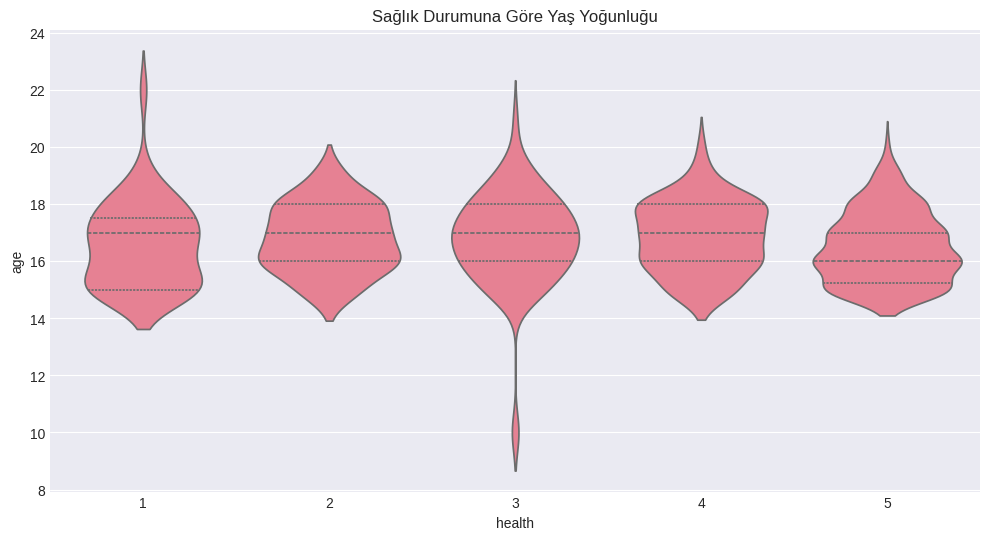

In [79]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df,
    x="health",
    y="age",
    inner="quartile"
)
plt.title("Sağlık Durumuna Göre Yaş Yoğunluğu")
plt.show()


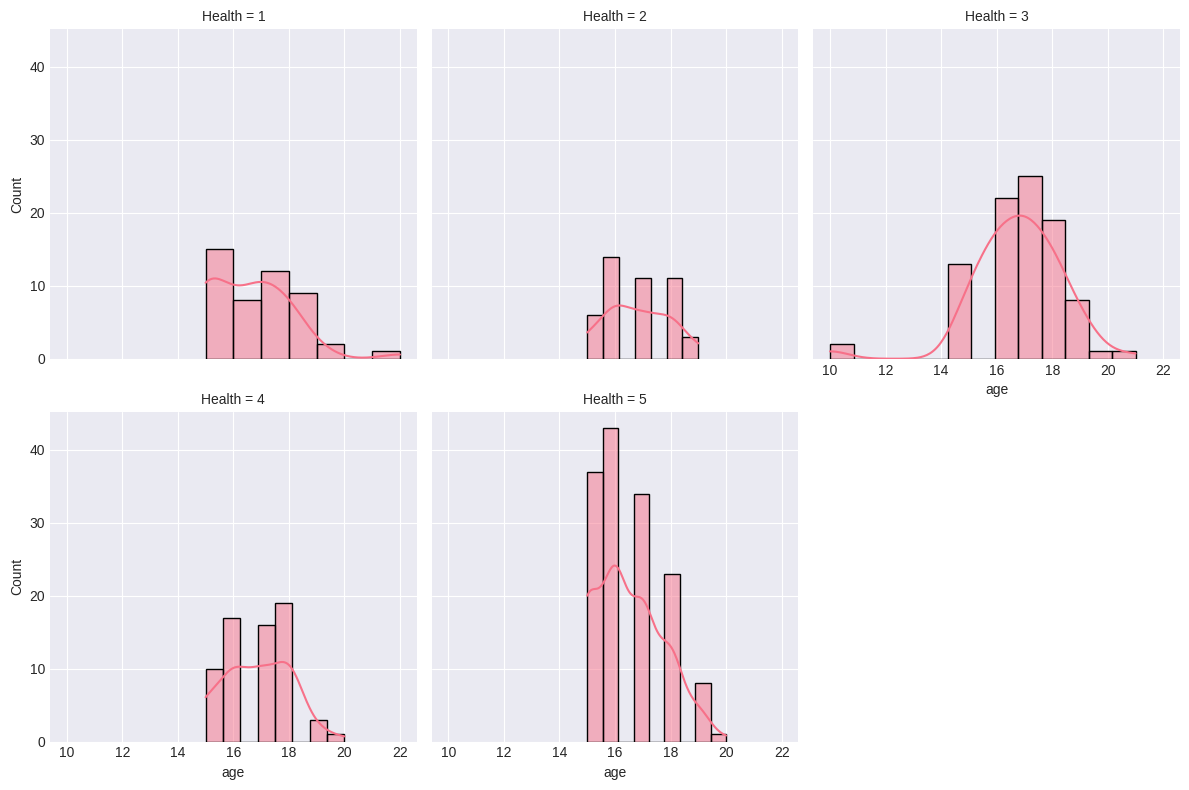

In [80]:
g = sns.FacetGrid(df, col="health", col_wrap=3, height=4)
g.map(sns.histplot, "age", kde=True)
g.set_titles("Health = {col_name}")
plt.show()


Bu görselleştirmede öğrencilerin yaş dağılımı, sağlık durumlarına göre ayrı alt grafiklerde (FacetGrid) incelenmiştir.


FacetGrid ve KDE plot kullanılırken, çizilen sayısal değişkenin değer aralığına
uygun eksen sınırlarının belirlenmesi gerekmektedir. Aksi halde yoğunluk grafikleri
görünmeyebilir. Ayrıca ordinal kategorik değişkenlerde boxplot ve violin plot
kullanımı daha anlamlı sonuçlar sunar.


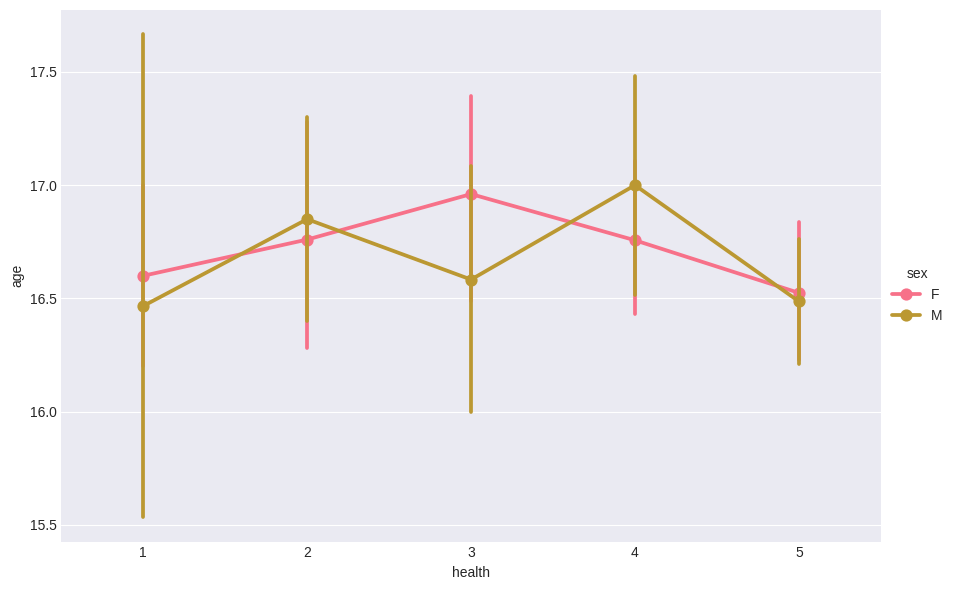

In [81]:
sns.catplot(
    data=df,
    x="health",
    y="age",
    hue="sex",
    kind="point",
    height=6,
    aspect=1.5
)

Bu görselleştirmede sağlık durumu ve cinsiyet kırılımında öğrencilerin yaş ortalamaları incelenmiştir.


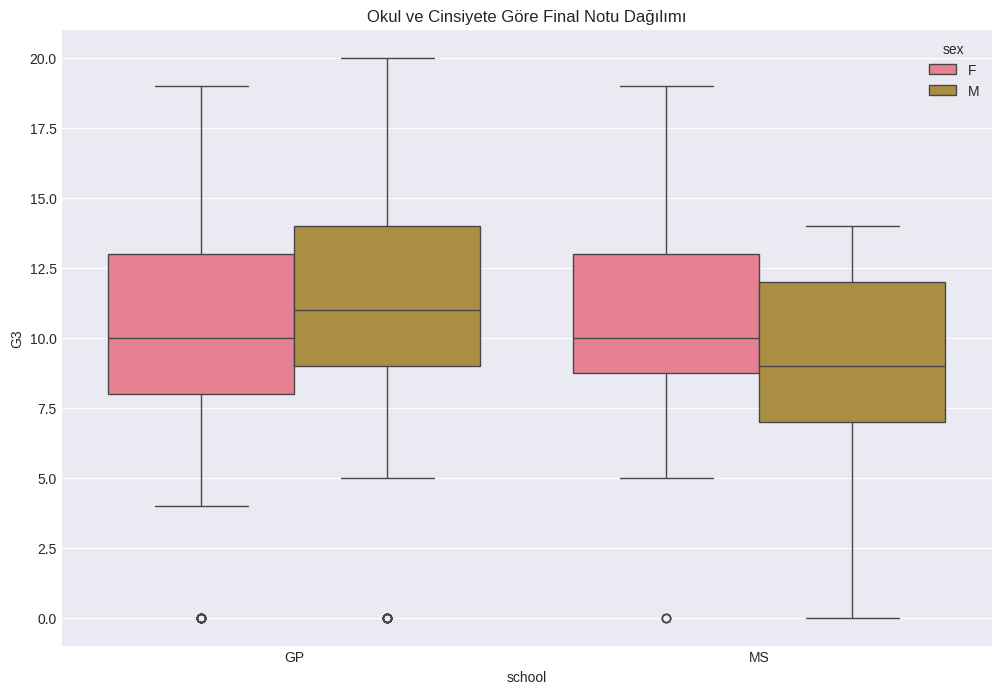

In [82]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df,
    x="school",
    y="G3",
    hue="sex"
)
plt.title("Okul ve Cinsiyete Göre Final Notu Dağılımı")
plt.show()


Pairplot, veri setindeki sayısal değişkenler arasındaki ikili ilişkileri ve her bir değişkenin kendi dağılımını aynı anda görselleştirmeye yarayan bir Seaborn grafik türüdür. Keşifsel veri analizi (EDA) aşamasında değişkenler arasındaki korelasyonları, örüntüleri ve olası aykırı değerleri hızlıca incelemek için kullanılır.

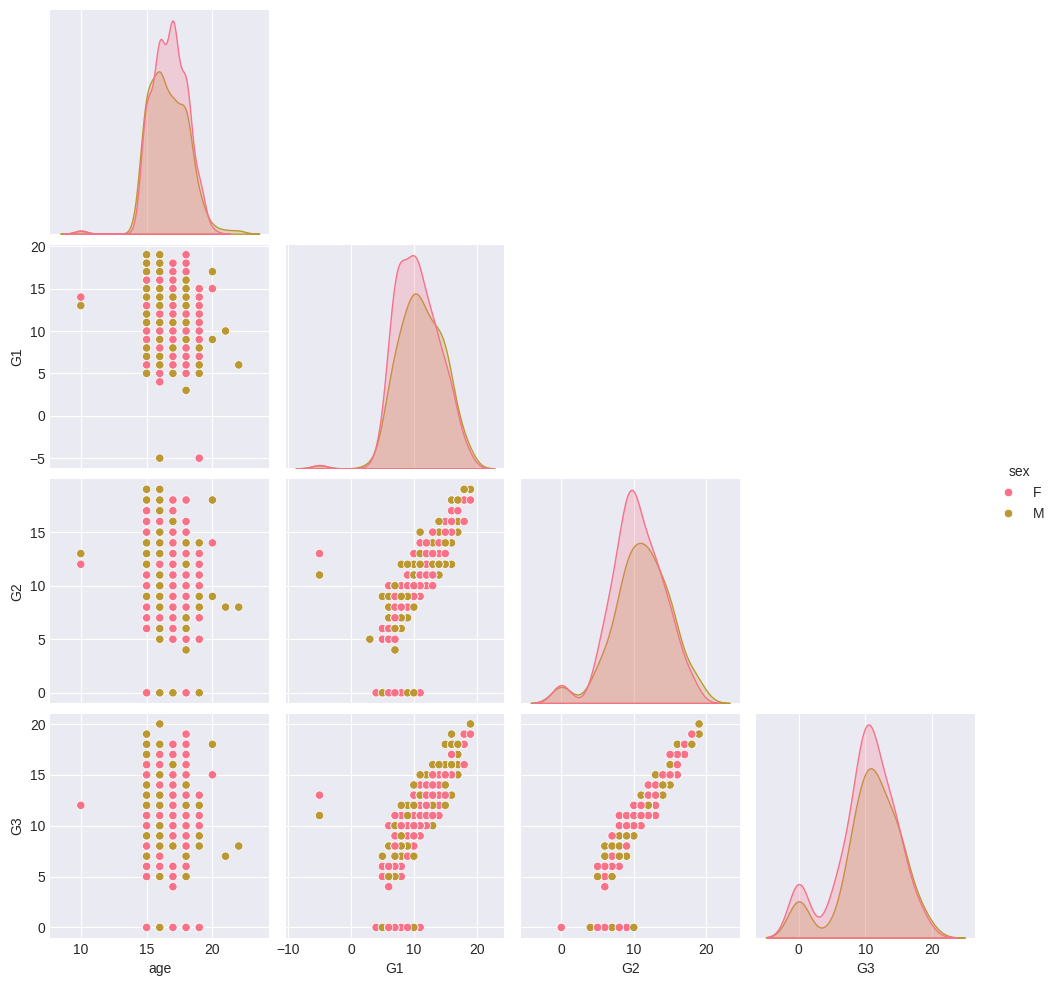

In [83]:
sns.pairplot(
    data=df,
    vars=["age", "G1", "G2", "G3"],
    hue="sex",
    diag_kind="kde",
    corner=True
)
plt.show()


Scatterplot (dağılım grafiği), iki sayısal değişken arasındaki ilişkiyi görselleştirmek için kullanılır. Noktaların konumu sayesinde değişkenler arasındaki korelasyon, eğilimler, kümelenmeler ve aykırı değerler kolayca gözlemlenebilir. Kategorik bir değişken ise hue parametresiyle renk ayrımı yapılarak analize dahil edilebilir.

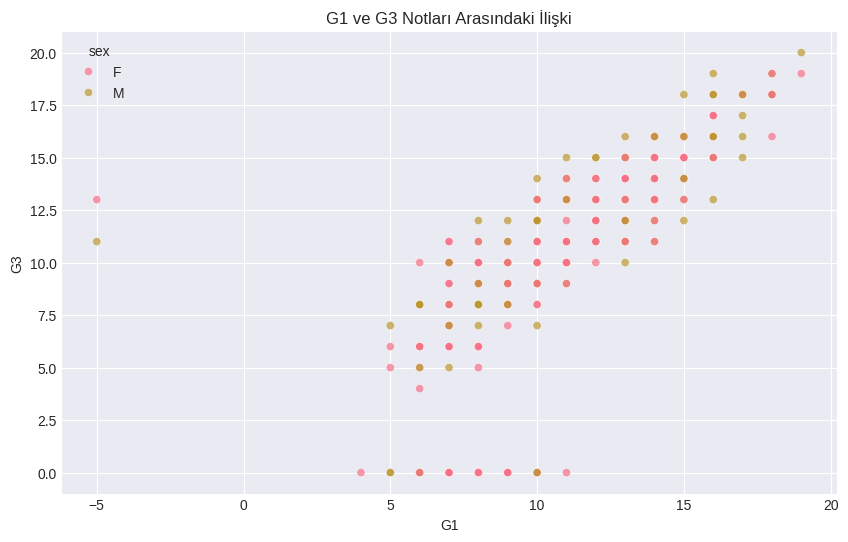

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="G1",
    y="G3",
    hue="sex",
    alpha=0.7
)
plt.title("G1 ve G3 Notları Arasındaki İlişki")
plt.show()


Heatmap (ısı haritası), sayısal değişkenler arasındaki korelasyonları corr() fonksiyonu ile hesaplanan korelasyon matrisi üzerinden görselleştirmek için kullanılan bir grafiktir. Renk yoğunluğu, değişkenler arasındaki ilişkinin gücünü ve yönünü (pozitif / negatif) gösterir ve veri setindeki ilişkileri hızlıca fark etmeyi sağlar.

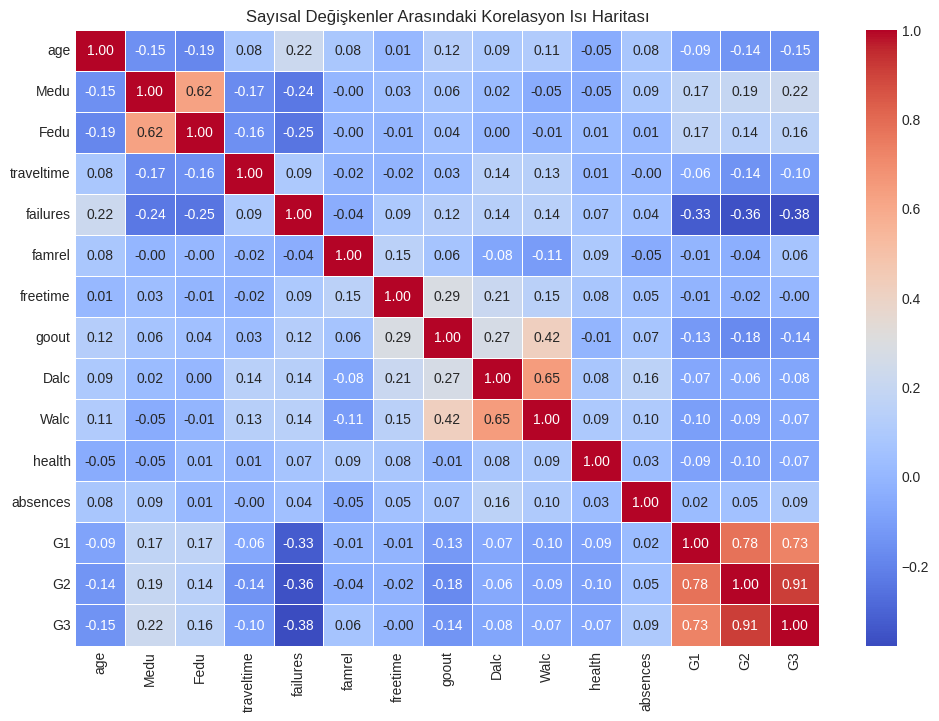

In [85]:
plt.figure(figsize=(12, 8))

corr_matrix = df.select_dtypes(include=["int64", "float64"]).corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Sayısal Değişkenler Arasındaki Korelasyon Isı Haritası")
plt.show()


Haftalık çalışma süresine göre not değişimi

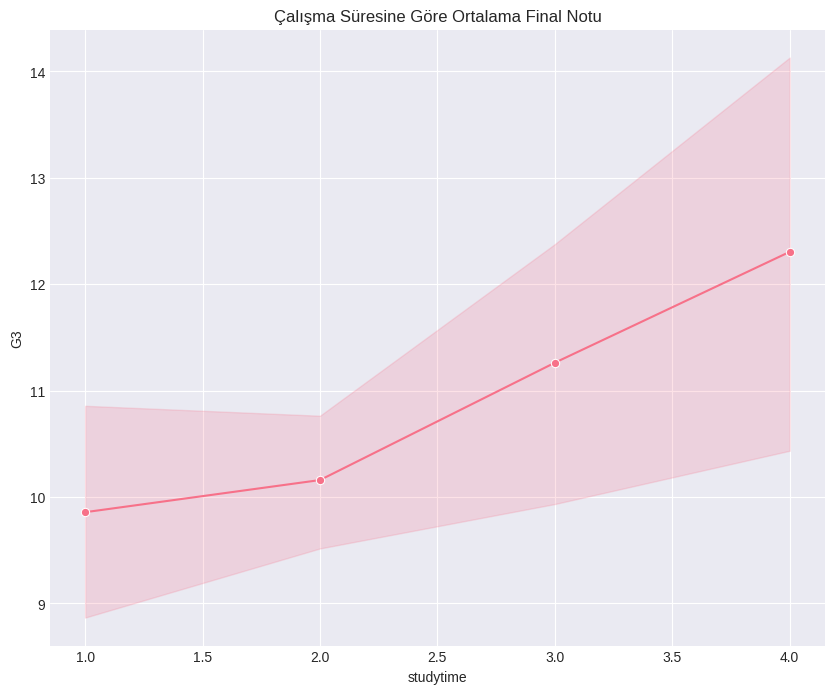

In [86]:
plt.figure(figsize=(10, 8))
sns.lineplot(
    data=df,
    x="studytime",
    y="G3",
    estimator="mean",
    marker="o"
)
plt.title("Çalışma Süresine Göre Ortalama Final Notu")
plt.show()


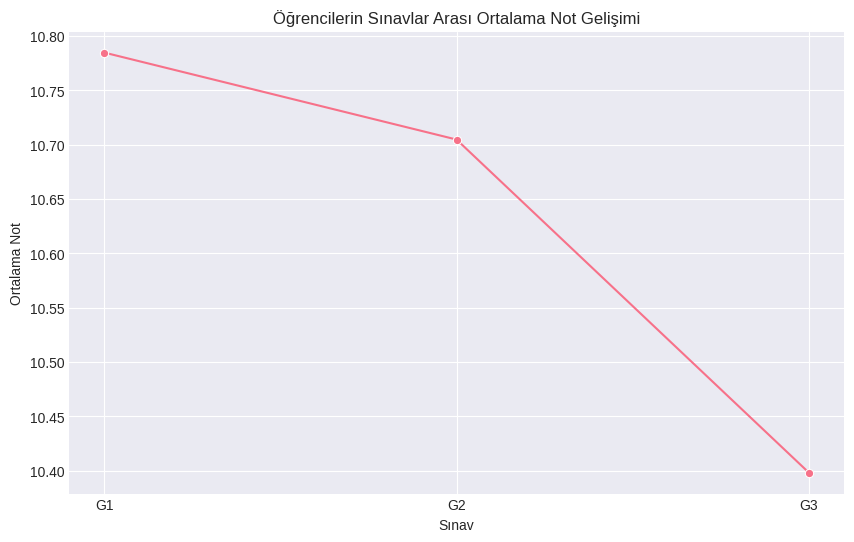

In [87]:
# Notların sınavlar arasındaki ortalama gelişimini inceleyelim
grade_means = df[["G1", "G2", "G3"]].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(
    x=grade_means.index,
    y=grade_means.values,
    marker="o"
)

plt.title("Öğrencilerin Sınavlar Arası Ortalama Not Gelişimi")
plt.xlabel("Sınav")
plt.ylabel("Ortalama Not")
plt.show()


Bu çizgi grafik, öğrencilerin birinci (G1), ikinci (G2) ve final (G3) sınavlarındaki ortalama not değişimini göstermektedir.


**5. Aykırı Değer Analizi (Outliers)**

Aykırı değerler, veri setindeki genel dağılımdan önemli ölçüde sapma gösteren gözlemlerdir. Tıpkı eksik verilerde olduğu gibi aykırı değerler de dikkatle ele alınmalıdır. Aykırı değerlerin varlığı; ortalama, standart sapma gibi istatistiksel ölçüleri bozabilir ve bu durum makine öğrenmesi modellerinin genellenebilirliğini olumsuz etkileyebilir.

Aykırı değerlerin tespiti ve değerlendirilmesi için farklı yöntemler bulunmaktadır:

Sektörel / alan bilgisi

Standart sapma yaklaşımı

Z-skoru

IQR (Interquartile Range) yöntemi

In [88]:
df = df.copy()

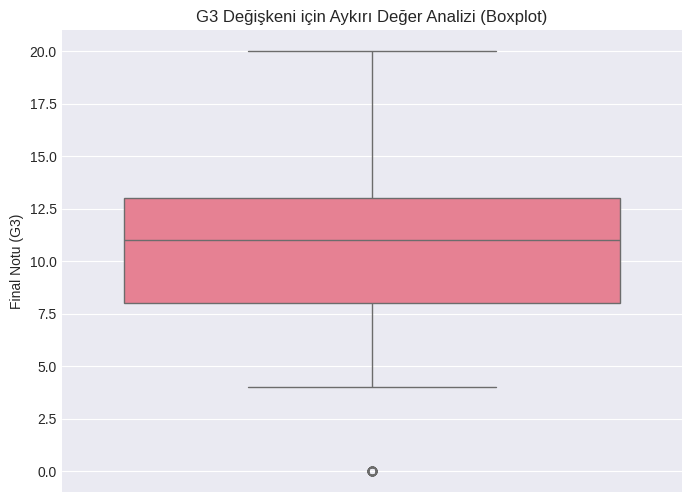

In [89]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    y="G3",
    orient="v"
)

plt.title("G3 Değişkeni için Aykırı Değer Analizi (Boxplot)")
plt.ylabel("Final Notu (G3)")
plt.show()

In [90]:
df_G3 = df['G3']
df_G3

,G3
0,NaN
1,6.0
2,10.0
3,15.0
4,10.0
...,...
390,NaN
391,NaN
392,7.0
393,NaN


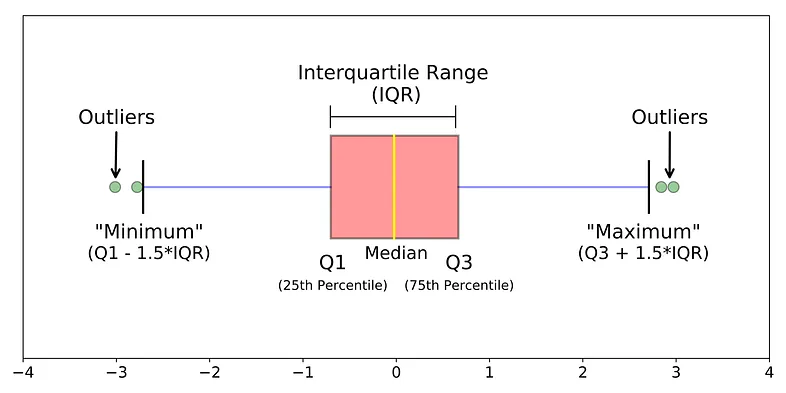

In [91]:
# İncelenecek sayısal değişken
df_G3 = df["G3"]

# Quantile değerlerin belirlenmesi
Q1 = df_G3.quantile(0.25)
Q3 = df_G3.quantile(0.75)

print("Q1 (25. Çeyrek):", Q1)
print("Q3 (75. Çeyrek):", Q3)

# IQR değerinin hesaplanması
IQR = Q3 - Q1
print("IQR:", IQR)

# Alt ve üst sınırların belirlenmesi
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print("Alt sınır:", lower_fence)
print("Üst sınır:", upper_fence)


Q1 (25. Çeyrek): 8.0
Q3 (75. Çeyrek): 13.0
IQR: 5.0
Alt sınır: 0.5
Üst sınır: 20.5


In [92]:
# Üst sınırın üzerinde kalan aykırı gözlemlerin index değerleri
outlier_idx = df[df["G3"] > upper_fence].index

outlier_idx

Index([], dtype='int64')

Bu çıktı bize şunu açıklar: IQR yöntemi ile belirlenen alt ve üst sınırların dışında kalan hiçbir gözlem yoktur.

In [93]:
df["G3"].min(), df["G3"].max()


(0.0, 20.0)

**5.1 Aykırı Gözlemlerin Silinmesi**

In [94]:
df_del = df[
    ~((df["G3"] < lower_fence) | (df["G3"] > upper_fence))
]

df_del


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,NaN,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6.0,5,6.0,NaN
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5,5.0,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7,8.0,10.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15,14.0,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11.0,9,9.0,NaN
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3.0,14,16.0,NaN
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3.0,10,8.0,7.0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0.0,11,12.0,NaN


IQR yöntemi ile belirlenen alt ve üst sınırların dışında kalan aykırı gözlemler veri setinden silinmiştir.


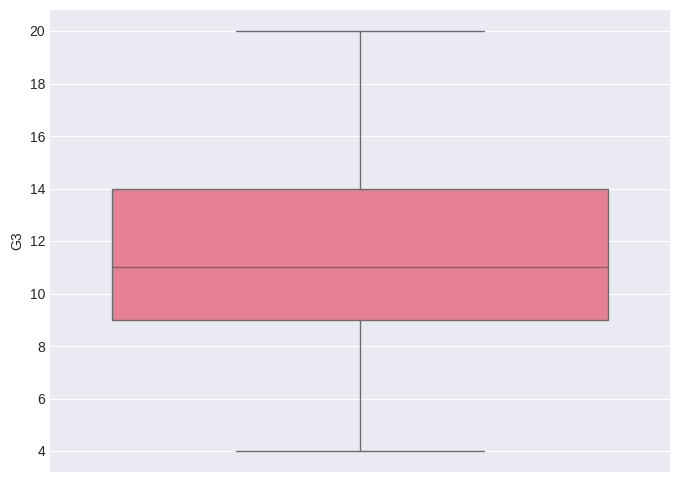

In [95]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["G3"],
            orient = "v");

**5.2 Aykırı Gözlemlerin Doldurulması**

5.2.1 Ortalama Değer İle Doldurma

In [96]:
df.loc[df_G3 > upper_fence, "G3"] = df_G3.mean()

In [97]:
df.loc[df_G3 > upper_fence, "G3"]

,G3


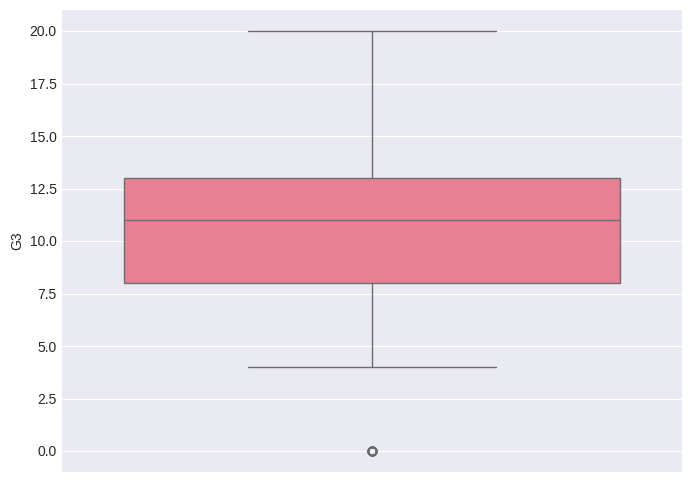

In [98]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["G3"],
            orient = "v");

5.2.2 Baskılama Yöntemi

In [99]:
df = df.copy()

In [100]:
df.loc[df_G3 > upper_fence, "G3"] = upper_fence

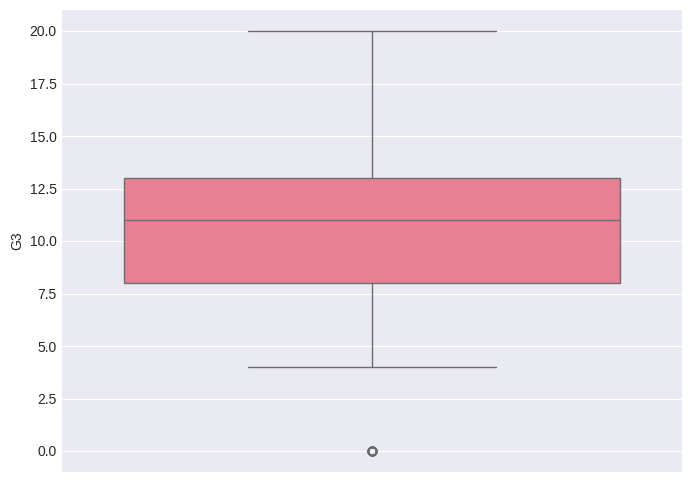

In [101]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["G3"],
            orient = "v");

**6. Feature Engineering**

**Feature Engineering nedir?**
- Feature engineering, modelin öğrenme kapasitesini artırmak amacıyla mevcut değişkenlerden **yeni, anlamlı özellikler**  üretme sürecidir.
- Modelin daha iyi öğrenmesini sağlar

**Örnek senaryolar:**
- Üç sınav notundan "ortalama not" hesaplamak
- Doğum yılından "yaş" hesaplamak
- İsim soyisimden "isim uzunluğu" çıkarmak

**6.1 Yeni Özellik Türetme (Feature Creation)**

In [102]:
# Ortalama Not Özelliği
df["grade_mean"] = df[["G1", "G2", "G3"]].mean(axis=1)
# Öğrencilerin sınavlardaki genel başarı seviyesini temsil eden ortalama not değişkeni oluşturulmuştur.

In [103]:
# Not Gelişimi (Final – İlk Sınav)
df["grade_progress"] = df["G3"] - df["G1"]
# Öğrencinin dönem boyunca akademik gelişimini temsil eden not ilerleme değişkeni oluşturulmuştur

In [104]:
# Ortalama nota göre başarı segmentasyonu
def grade_range(grade):
    if grade < 8:
        return "Low"
    elif 8 <= grade < 14:
        return "Medium"
    else:
        return "High"

df["grade_mean"] = df[["G1", "G2", "G3"]].mean(axis=1)
df["grade_range"] = df["grade_mean"].apply(grade_range)

df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,grade_mean,grade_progress,grade_range
0,NaN,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6.0,5,6.0,NaN,5.500000,NaN,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4.0,5,5.0,6.0,5.333333,1.0,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10.0,7,8.0,10.0,8.333333,3.0,Medium


In [105]:
# Not gelişim yönü
df["performance_trend"] = df.apply(
    lambda row: "Improved" if row["G3"] > row["G1"]
    else "Declined" if row["G3"] < row["G1"]
    else "Stable",
    axis=1
)

df["performance_trend"].value_counts()

,count
performance_trend,
Declined,147
Improved,132
Stable,116


Öğrencilerin dönem başı ve dönem sonu notları karşılaştırılarak akademik performans eğilimleri belirlenmiştir.

**6.2 One-Hot Encoding**

**Nominal kategorik değişkenler için:**

In [106]:
df = pd.get_dummies(
    df,
    columns=["school", "sex", "address", "Mjob", "Fjob", "reason", "guardian"],
    drop_first=True
)

Nominal kategorik değişkenler One-Hot Encoding yöntemi ile sayısal forma dönüştürülmüştür.


**6.3 Feature Scaling (Ölçekleme)**

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cols = ["age", "absences", "G1", "G2", "G3", "grade_mean", "grade_progress"]
df_before_scaling = df.copy() # Create a copy before scaling
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

Numerik değişkenler, model performansını artırmak amacıyla StandardScaler ile ölçeklendirilmiştir.


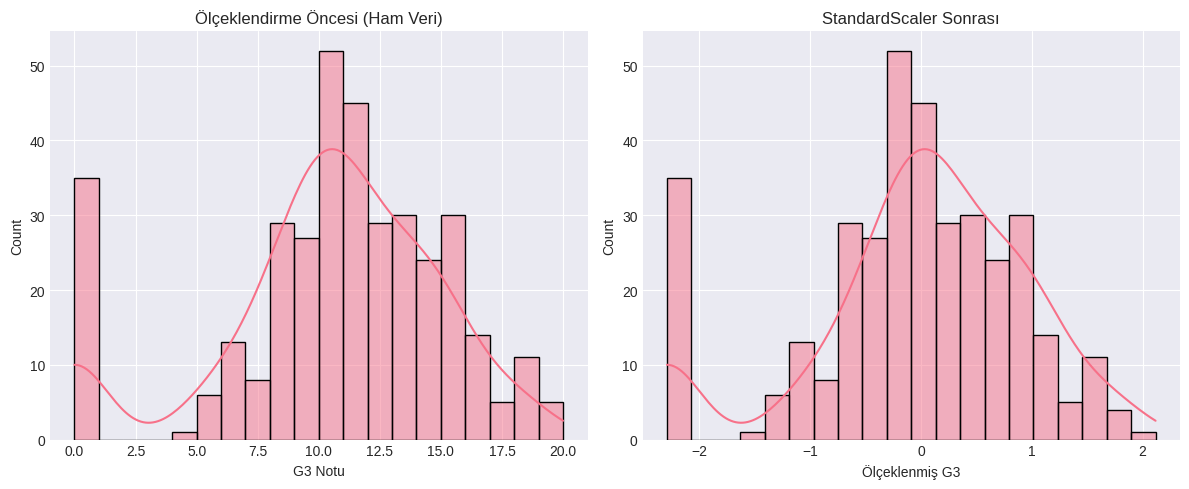

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ölçeklendirme öncesi (ham veri)
sns.histplot(df_before_scaling["G3"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Ölçeklendirme Öncesi (Ham Veri)")
axes[0].set_xlabel("G3 Notu")

# Ölçeklendirme sonrası
sns.histplot(df["G3"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("StandardScaler Sonrası")
axes[1].set_xlabel("Ölçeklenmiş G3")

plt.tight_layout()
plt.show()


In [109]:
print("Önce -> Mean:", df_before_scaling["G3"].mean(),
      "Std:", df_before_scaling["G3"].std())

print("Sonra -> Mean:", df["G3"].mean(),
      "Std:", df["G3"].std())

Önce -> Mean: 10.398351648351648 Std: 4.54340529897053
Sonra -> Mean: 1.0492217595358622e-16 Std: 1.0013764631429267


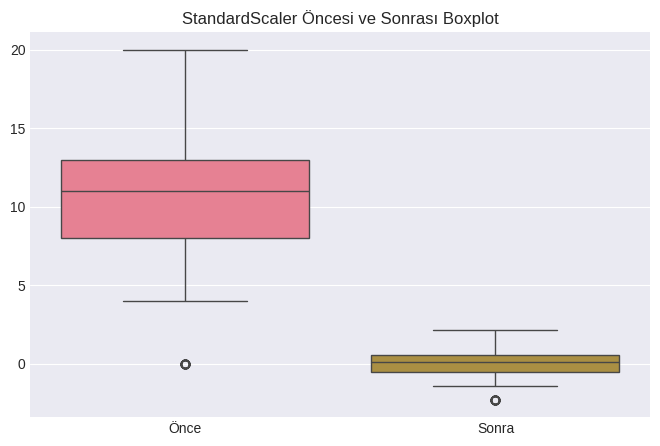

In [110]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=pd.DataFrame({
    "Önce": df_before_scaling["G3"],
    "Sonra": df["G3"]
}))

plt.title("StandardScaler Öncesi ve Sonrası Boxplot")
plt.show()